In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib.ticker import FuncFormatter

In [ ]:
url = 'https://drive.google.com/file/d/1Yx_DYY6a_S2xEomiAj38eGuro05XcoEI/view?usp=sharing'
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]
categories_df = pd.read_csv(path)
categories_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53231 entries, 0 to 53230
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id_order          53231 non-null  int64  
 1   product_quantity  53231 non-null  int64  
 2   sku               53231 non-null  object 
 3   unit_price        53231 non-null  float64
 4   date              53231 non-null  object 
 5   name              53231 non-null  object 
 6   desc              53231 non-null  object 
 7   price             53231 non-null  float64
 8   type              52904 non-null  float64
 9   discount          53231 non-null  float64
 10  product_category  53231 non-null  object 
dtypes: float64(4), int64(2), object(5)
memory usage: 4.5+ MB


In [ ]:
categories_df['date'] = pd.to_datetime(categories_df['date'])
categories_df['type'] = pd.to_numeric(categories_df['type']).astype('Int64')
categories_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53231 entries, 0 to 53230
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   id_order          53231 non-null  int64         
 1   product_quantity  53231 non-null  int64         
 2   sku               53231 non-null  object        
 3   unit_price        53231 non-null  float64       
 4   date              53231 non-null  datetime64[ns]
 5   name              53231 non-null  object        
 6   desc              53231 non-null  object        
 7   price             53231 non-null  float64       
 8   type              52904 non-null  Int64         
 9   discount          53231 non-null  float64       
 10  product_category  53231 non-null  object        
dtypes: Int64(1), datetime64[ns](1), float64(3), int64(2), object(4)
memory usage: 4.5+ MB


<Axes: xlabel='year,month'>

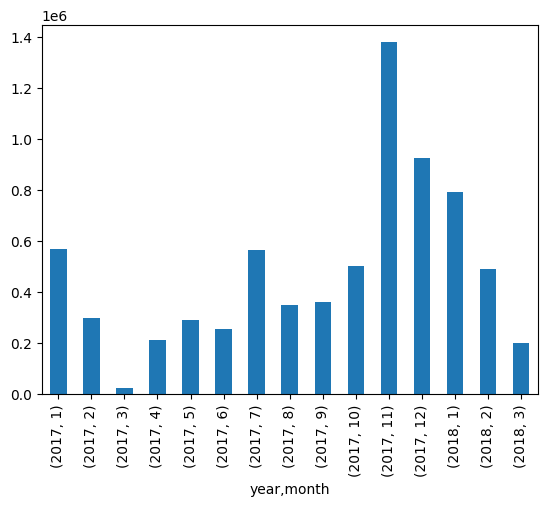

In [ ]:
####### Are there seasonal patterns in the evolution of sales?
categories_df["month"] = categories_df["date"].dt.month
categories_df["year"] = categories_df["date"].dt.year
monthly_sales = categories_df.groupby(["year", "month"])["unit_price"].sum()
monthly_sales.plot(kind="bar")

In [ ]:
# which are the top 10 most sold product categories?
categories_df.groupby('product_category').sum().nlargest(15, 'unit_price')
# categories_df.groupby('type').sum().nlargest(10, 'price')

/var/folders/qp/byv49jm10nl3sccrqp350xn80000gn/T/ipykernel_7527/1489381294.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  categories_df.groupby('product_category').sum().nlargest(15, 'unit_price')


,id_order,product_quantity,unit_price,price,type,discount,month,year
product_category,,,,,,,,
IPhone,844504561,2057,1075867.18,1175293.44,123578242296,99426.26,15898,4046378
Hard Drives,2674630436,8075,983433.86,1177755.17,106331585908,194321.31,40134,13240827
Monitors,620744186,1722,578574.33,658293.91,1929744,79719.58,9143,3003659
SSD Expansion Kits,1106140689,3051,553039.44,666022.75,24211929985,112983.31,16162,5424287
Other,1741043489,4763,532215.81,683248.86,49179864905,151033.05,25715,8363466
NAS,459368011,1114,452907.80,495632.31,13307708921,42724.51,7564,2204791
Memory (RAM) for Mac Computers,1256825089,3822,341900.01,407051.21,4277504,65151.20,18209,6325858
IPad,217748251,539,306143.65,327971.55,23869614140,21827.90,3701,1028775
Headsets & Headphones,1001485906,2541,246900.13,315898.94,12485496,68998.81,17729,4677883


In [ ]:
# sorted_price = categories_df.groupby('type').sum().sort_values(by='price', ascending=False)
sorted_price = categories_df.groupby('product_category').sum().sort_values(by='unit_price', ascending=False)
sorted_price.reset_index(inplace=True)
sorted_price


/var/folders/qp/byv49jm10nl3sccrqp350xn80000gn/T/ipykernel_7527/2472247817.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sorted_price = categories_df.groupby('product_category').sum().sort_values(by='unit_price', ascending=False)


,product_category,id_order,product_quantity,unit_price,price,type,discount,month,year
0,IPhone,844504561,2057,1075867.18,1175293.44,123578242296,99426.26,15898,4046378
1,Hard Drives,2674630436,8075,983433.86,1177755.17,106331585908,194321.31,40134,13240827
2,Monitors,620744186,1722,578574.33,658293.91,1929744,79719.58,9143,3003659
3,SSD Expansion Kits,1106140689,3051,553039.44,666022.75,24211929985,112983.31,16162,5424287
4,Other,1741043489,4763,532215.81,683248.86,49179864905,151033.05,25715,8363466
5,NAS,459368011,1114,452907.80,495632.31,13307708921,42724.51,7564,2204791
6,Memory (RAM) for Mac Computers,1256825089,3822,341900.01,407051.21,4277504,65151.20,18209,6325858
7,IPad,217748251,539,306143.65,327971.55,23869614140,21827.90,3701,1028775
8,Headsets & Headphones,1001485906,2541,246900.13,315898.94,12485496,68998.81,17729,4677883
9,Wacom Tablets,494226845,1317,231472.45,291482.00,1660710,60009.55,8572,2384279


In [ ]:
sorted_price['unit_price_percentage'] = (sorted_price['unit_price'] / sorted_price['unit_price'].sum()) * 100
sorted_price['unit_price_percentage'] = sorted_price['unit_price_percentage'].round(2)
sorted_price

,product_category,id_order,product_quantity,unit_price,price,type,discount,month,year,unit_price_percentage
0,IPhone,844504561,2057,1075867.18,1175293.44,123578242296,99426.26,15898,4046378,14.92
1,Hard Drives,2674630436,8075,983433.86,1177755.17,106331585908,194321.31,40134,13240827,13.64
2,Monitors,620744186,1722,578574.33,658293.91,1929744,79719.58,9143,3003659,8.02
3,SSD Expansion Kits,1106140689,3051,553039.44,666022.75,24211929985,112983.31,16162,5424287,7.67
4,Other,1741043489,4763,532215.81,683248.86,49179864905,151033.05,25715,8363466,7.38
5,NAS,459368011,1114,452907.80,495632.31,13307708921,42724.51,7564,2204791,6.28
6,Memory (RAM) for Mac Computers,1256825089,3822,341900.01,407051.21,4277504,65151.20,18209,6325858,4.74
7,IPad,217748251,539,306143.65,327971.55,23869614140,21827.90,3701,1028775,4.24
8,Headsets & Headphones,1001485906,2541,246900.13,315898.94,12485496,68998.81,17729,4677883,3.42
9,Wacom Tablets,494226845,1317,231472.45,291482.00,1660710,60009.55,8572,2384279,3.21


In [ ]:
# Aggregate rows
start_row = 13
aggregated_row = sorted_price.iloc[start_row:42].sum(numeric_only=True)
aggregated_row['product_category'] = 'Rest'

# Create a new DataFrame with rows 1 to 10 and the aggregated row
aggregated_revenue_df = pd.concat([sorted_price.iloc[:start_row], pd.DataFrame([aggregated_row])], ignore_index=True)

aggregated_revenue_df


,product_category,id_order,product_quantity,unit_price,price,type,discount,month,year,unit_price_percentage
0,IPhone,8.445046e+08,2057.0,1075867.18,1175293.44,123578242296.0,99426.26,15898.0,4046378.0,14.92
1,Hard Drives,2.674630e+09,8075.0,983433.86,1177755.17,106331585908.0,194321.31,40134.0,13240827.0,13.64
2,Monitors,6.207442e+08,1722.0,578574.33,658293.91,1929744.0,79719.58,9143.0,3003659.0,8.02
3,SSD Expansion Kits,1.106141e+09,3051.0,553039.44,666022.75,24211929985.0,112983.31,16162.0,5424287.0,7.67
4,Other,1.741043e+09,4763.0,532215.81,683248.86,49179864905.0,151033.05,25715.0,8363466.0,7.38
5,NAS,4.593680e+08,1114.0,452907.80,495632.31,13307708921.0,42724.51,7564.0,2204791.0,6.28
6,Memory (RAM) for Mac Computers,1.256825e+09,3822.0,341900.01,407051.21,4277504.0,65151.20,18209.0,6325858.0,4.74
7,IPad,2.177483e+08,539.0,306143.65,327971.55,23869614140.0,21827.90,3701.0,1028775.0,4.24
8,Headsets & Headphones,1.001486e+09,2541.0,246900.13,315898.94,12485496.0,68998.81,17729.0,4677883.0,3.42
9,Wacom Tablets,4.942268e+08,1317.0,231472.45,291482.00,1660710.0,60009.55,8572.0,2384279.0,3.21


In [ ]:
res = aggregated_revenue_df['unit_price_percentage'].sum()
res

100.0

/var/folders/qp/byv49jm10nl3sccrqp350xn80000gn/T/ipykernel_78254/3593552929.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=aggregated_revenue_df['product_category'][:limit_row], x=aggregated_revenue_df['unit_price_percentage'][:limit_row], palette=palette)


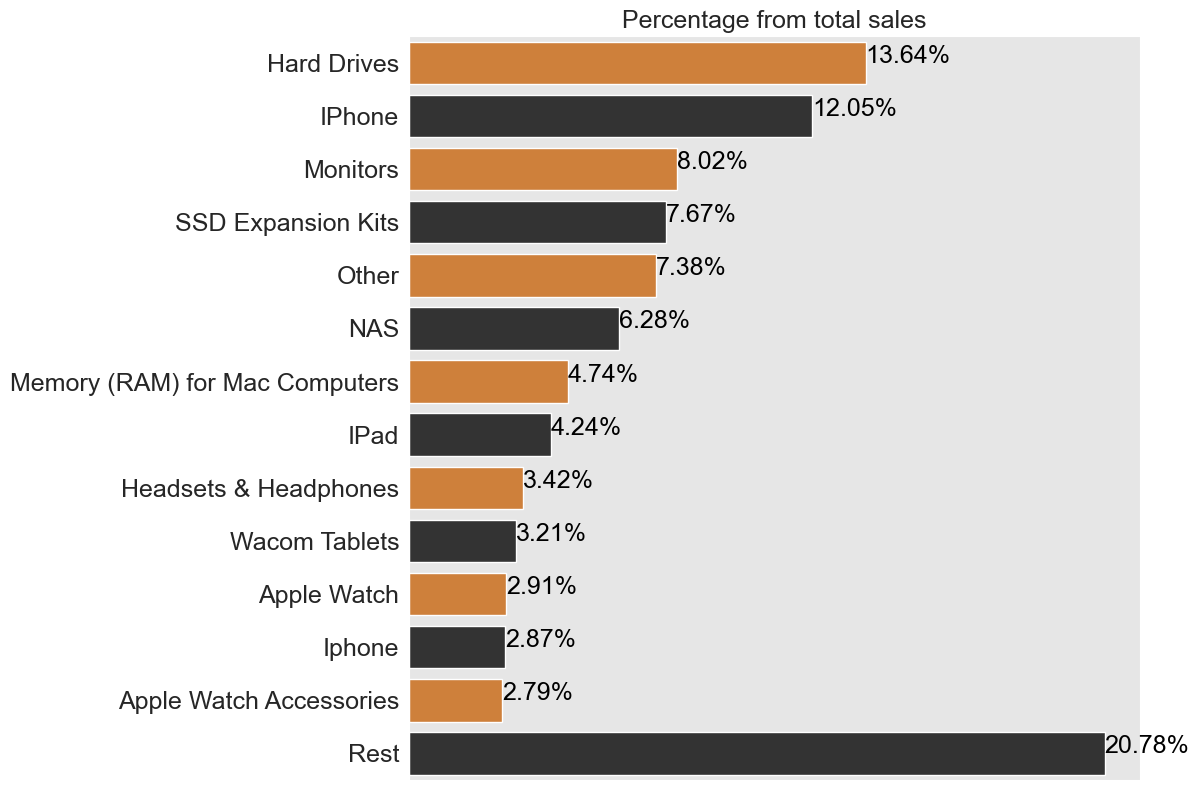

In [ ]:
# make a bar plot from sorted_price by using seaborn
limit_row = 14
size_font = 18
# palette = sns.color_palette("viridis", limit_row)
# palette[-1] = '#A0A0A0'  # Set specific color for the last bar
palette = ['#E67E22' if i % 2 == 0 else '#333333' for i in range(limit_row)]
sns.barplot(y=aggregated_revenue_df['product_category'][:limit_row], x=aggregated_revenue_df['unit_price_percentage'][:limit_row], palette=palette)
plt.title('Percentage from total sales', fontsize=size_font)
plt.ylabel('', fontsize=size_font)
plt.xlabel('', fontsize=size_font)
# plt.xlabel('Percentage from total sales', fontsize=size_font)
plt.xticks(fontsize=size_font)
plt.xticks([], fontsize=size_font)
plt.yticks(fontsize=size_font)
sns.set_style("dark", {"axes.facecolor": "0.9"})
ax = plt.gca()
# Custom function for float formatting
float_formatter = FuncFormatter(lambda x, _: f'{x:.0f}')
# Force float notation
ax.xaxis.set_major_formatter(float_formatter)
# Add values next to each bar
for index, value in enumerate(aggregated_revenue_df['unit_price_percentage'][:limit_row]):
    ax.text(value, index, f'{value:.2f}%', color='black', ha="left", fontsize=size_font)
plt.gcf().set_size_inches(12, 8)
plt.tight_layout()
plt.savefig('./plots/Top_revenue_percentage' + '.png')
plt.show()


In [ ]:
# sorted_price['type']
sorted_price['product_category']

0                          Hard Drives
1                               IPhone
2                             Monitors
3                   SSD Expansion Kits
4                                Other
5                                  NAS
6       Memory (RAM) for Mac Computers
7                                 IPad
8                Headsets & Headphones
9                        Wacom Tablets
10                         Apple Watch
11                              Iphone
12             Apple Watch Accessories
13                  Phone Cases/Covers
14                   Portable Speakers
15             Hard Drives Accessories
16                         Macs & Imac
17                             Charger
18                     Adapters & Hubs
19                           Keyboards
20                           Batteries
21        Open - Accessories & Gadgets
22                          Apple Care
23                   Cables & Adapters
24                     Pens & Pointers
25                   Ipad

In [ ]:
# type_categories = sorted_price['type'].tolist()
# type_categories
product_categories = sorted_price['product_category'].tolist()

product_categories

['Hard Drives',
 'IPhone',
 'Monitors',
 'SSD Expansion Kits',
 'Other',
 'NAS',
 'Memory (RAM) for Mac Computers',
 'IPad',
 'Headsets & Headphones',
 'Wacom Tablets',
 'Apple Watch',
 'Iphone',
 'Apple Watch Accessories',
 'Phone Cases/Covers',
 'Portable Speakers',
 'Hard Drives Accessories',
 'Macs & Imac',
 'Charger',
 'Adapters & Hubs',
 'Keyboards',
 'Batteries',
 'Open - Accessories & Gadgets',
 'Apple Care',
 'Cables & Adapters',
 'Pens & Pointers',
 'Ipad Cases/Covers',
 'Wifi Adapter & Accessories',
 'Memory Cards & USB Drives',
 'Mouses',
 'Stands & Supports',
 'Macbook Cases/Covers',
 'Tools & Toolkits',
 'Backpacks & Bags',
 'Cameras',
 'IPod',
 'Apple TV',
 'Replacement Parts',
 'Phone & Mac Cases/Covers',
 'Screen protector for Apple Watch',
 'Phone Accessories',
 'IPad Covers']

In [ ]:
len(product_categories)

41

In [ ]:
# plot line chart for the montly sales of the product category
# type_category = 11935397

# for i in type_categories:
for i in product_categories:

    type_category = i

    def plot_type_monthly(type_category, categories_df):
        # type_df = categories_df[categories_df['type'] == type_category]
        type_df = categories_df[categories_df['product_category'] == type_category]
        type_monthly_sales = type_df.groupby(["year", "month"]).agg({"unit_price": "sum", "product_quantity": "sum", "discount" : "sum"})
        type_monthly_sales_df = type_monthly_sales.reset_index()

        type_monthly_sales_df['date'] = type_monthly_sales_df['year'].astype(str) + "-" + type_monthly_sales_df['month'].astype(str)

        fig, axes = plt.subplots(2, 1, figsize=(10, 10))

        # Plot sales
        size_font = 16

        ax1_color = '#F9DC5C'
        sns.lineplot(x="date", y="unit_price", data=type_monthly_sales_df, marker="o", color=ax1_color, ax=axes[0])
        axes[0].set_title('Product category : ' + str(type_category), fontsize=size_font)
        axes[0].set_xticklabels(type_monthly_sales_df['date'], rotation=90)
        axes[0].grid(axis="y", linestyle="--", alpha=0.7)
        axes[0].set_xlabel('')
        axes[0].set_ylabel('Sales USD', fontsize=size_font)

        # Plot units sold
        ax2_color = '#A0A0A0'
        sns.lineplot(x="date", y="product_quantity", data=type_monthly_sales_df, marker="o", color=ax1_color, ax=axes[1])
        axes[1].set_xticklabels(type_monthly_sales_df['date'], rotation=90)
        # axes[1].grid(axis="y", linestyle="--", alpha=0.7)
        axes[1].set_xlabel('Months', fontsize=size_font)
        axes[1].set_ylabel('Units sold', fontsize=size_font)

        # Create a second y-axis for discount
        ax2 = axes[1].twinx()
        sns.lineplot(x="date", y="discount", data=type_monthly_sales_df, marker="o", color=ax2_color, ax=ax2)
        ax2.set_ylabel('Discounts USD', fontsize=size_font)
        ax2.yaxis.label.set_color(ax2_color)
        # ax2.tick_params(axis='y', colors=ax2_color)

        axes[0].tick_params(axis='both', which='major', labelsize=size_font)
        axes[1].tick_params(axis='both', which='major', labelsize=size_font)
        ax2.tick_params(axis='both', which='major', labelsize=size_font)

        plt.tight_layout()
        sns.set_style("dark")
        plt.show()

        qc_string = str(type_category).replace("/", "_")

        fig.savefig('./plots/' + f"{product_categories.index(i):03d}" + "_" + qc_string + '.png')

    # Call the function
    plot_type_monthly(type_category, categories_df)
